In [33]:
from sklearn.impute import KNNImputer
from utils import *
import matplotlib.pyplot as plt

In [34]:
def knn_impute_by_user(matrix, valid_data, k):
    imputer = KNNImputer(n_neighbors=k)
    # Impute the missing values using NaN-Euclidean distance.
    filled_matrix = imputer.fit_transform(matrix)
    accuracy = sparse_matrix_evaluate(valid_data, filled_matrix)
    return accuracy

In [35]:
def knn_impute_by_item(matrix, valid_data, k):
    # Transpose the matrix so that rows represent questions instead of users.
    matrix = matrix.T
    imputer = KNNImputer(n_neighbors=k)
    # Impute the missing values using NaN-Euclidean distance.
    filled_matrix = imputer.fit_transform(matrix)
    # Transpose back to evaluate based on users again.
    accuracy = sparse_matrix_evaluate(valid_data, filled_matrix.T)
    
    return accuracy

In [36]:
def user_based_report_knn(sparse_matrix, valid_data, test_data, k_list):
    accuracies = []
    
    # Calculate accuracy for each value of k in the provided list
    for k in k_list:
        accuracies.append(knn_impute_by_user(sparse_matrix, valid_data, k))
    
    # Plot the accuracies against the corresponding k values
    plt.plot(k_list, accuracies, 'b-')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()
    
    # Select the k that gives the highest accuracy
    optimal_k = k_list[accuracies.index(max(accuracies))]
    test_accuracy = knn_impute_by_user(sparse_matrix, test_data, optimal_k)
    
    print(f"The optimal k is {optimal_k} and the test accuracy is {test_accuracy}")

In [37]:
def item_based_report_knn(sparse_matrix, valid_data, test_data, k_list):
    accuracies = []
    
    # Compute accuracy for each value of k in the given list
    for k in k_list:
        accuracies.append(knn_impute_by_item(sparse_matrix, valid_data, k))
    
    # Plot the accuracies against k values
    plt.plot(k_list, accuracies, 'b-')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()
    
    # You can dynamically choose the best k, but here it is predefined as 21
    best_k = 21
    test_accuracy = knn_impute_by_item(sparse_matrix, test_data, best_k)
    
    print(f"The chosen k is {best_k} and the test accuracy is {test_accuracy}")

In [38]:
def main():
    # Load the training data, validation data, and test data
    sparse_matrix = load_train_sparse("data").toarray()
    val_data = load_valid_csv("data")
    test_data = load_public_test_csv("data")

    # Display the sparse matrix and its dimensions for reference
    print("Sparse matrix:")
    print(sparse_matrix)
    print("Matrix dimensions:")
    print(sparse_matrix.shape)

    k_values = [1, 6, 11, 16, 21, 26]
    
    # Report results for both user-based and item-based collaborative filtering
    user_based_report_knn(sparse_matrix, val_data, test_data, k_values)
    item_based_report_knn(sparse_matrix, val_data, test_data, k_values)

Sparse matrix:
[[nan nan nan ... nan nan nan]
 [nan  0. nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Matrix dimensions:
(542, 1774)


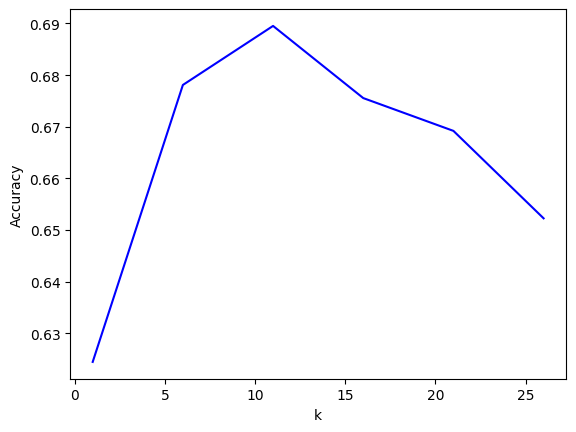

The optimal k is 11 and the test accuracy is 0.6841659610499576


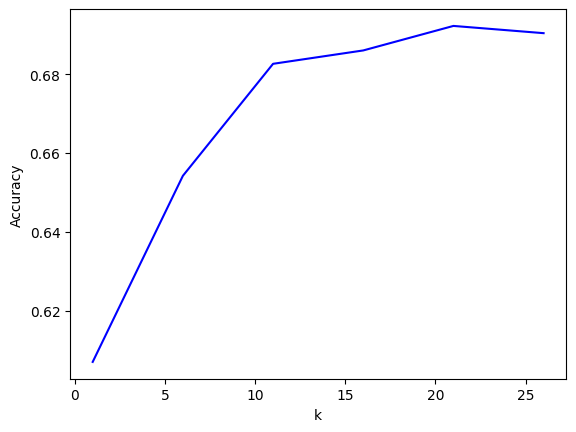

The chosen k is 21 and the test accuracy is 0.6816257408975445


In [39]:
if __name__ == "__main__":
    main()